# プロット改良

In [2]:
import cdflib
import pytplot
from pytplot import data_quants
import pyspedas
import xarray as xr
import numpy as np

# ファイル名
file_path_1 = "it_h1_hf_20240512_v01.cdf"


# CDFファイルに含まれる変数の情報を取得
# variables_info = cdf_file.cdf_info()
# print(variables_info['zVariables'])
# -> ['Epoch', 'Frequency', 'RH', 'LH']


# CDFファイルを開く
cdf_file = cdflib.CDF(file_path_1)
# CDFファイルの読み込み
pytplot.cdf_to_tplot(file_path_1)

#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
time = data_quants["RH"]['time']
data_L = data_quants["LH"]


In [2]:
# def variables_show(file_path):
#     # ファイルのパス
#     # file_path_1 = 'hf_20220417.cdf'

#     # CDFファイルを開く
#     cdf_file = cdflib.CDF(file_path)

#     # CDFファイルに含まれる変数の情報を取得
#     variables_info = cdf_file.cdf_info()

#     print(variables_info['zVariables'])
#     print("\n")
    
    
#     # var_name_show = variables_info['zVariables']
#     for i in range(len(variables_info['zVariables'])):
#         print(f"Variable: {variables_info['zVariables'][i]}")

#         # # 変数の属性を取得
#         # var_attributes = cdf_file.varattsget(variables_info['zVariables'][i])
#         print(f"Attributes: {cdf_file.varattsget(variables_info['zVariables'][i])}")

#         #変数のデータを取得
#         var_data_show = cdf_file.varget(variables_info['zVariables'][i])
#         print(f"Data: {cdf_file.varget(variables_info['zVariables'][i])}")
        
#         # 変数のタイプ
#         print(f"Type: {type(cdf_file.varget(variables_info['zVariables'][i]))}")
        
#         # 変数の次元数
#         print(f"Dimension: {cdf_file.varget(variables_info['zVariables'][i]).ndim}")
        
#         # 変数のサイズ
#         print(f"Shape: {cdf_file.varget(variables_info['zVariables'][i]).shape}")
        
#         # 変数の全要素数
#         print(f"Size: {cdf_file.varget(variables_info['zVariables'][i]).size}")
        
        
#         print("-----------")

# variables_show(file_path_1)

15 MHz = n_min = 40 (15014648)

20 MHz = n_min = 203 (19989014)

25 MHz = n_min = 367 (24993896)

30 MHz = n_max = 532 (29998780)

35 MHz = n_max = 696 (35003664)

40 MHz = n_max = 860 (40008544)

5MHz間で 163-165bin

## ALL

n_min = 0 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(13560000., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.356e+07
    v          float32 4B 1.356e+07 

n_max = 500 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(28530000., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.853e+07
    v          float32 4B 2.853e+07 
 ---------------------------------- 



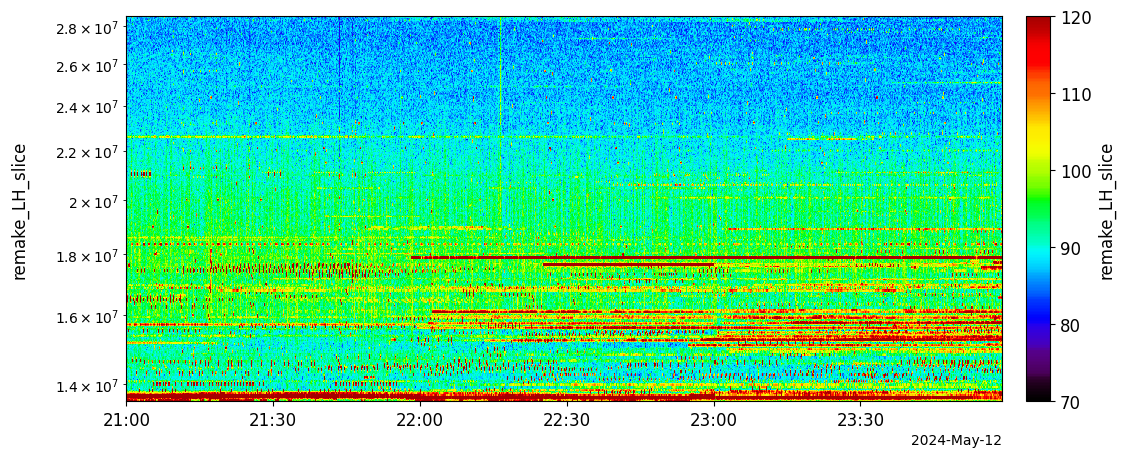

In [5]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index_L = data_L.sel(v_dim=slice(n_min, n_max))

v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index_L, 'v': v_dim_slice})

pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[70, 120]}) # z(強度)の分解能は1
pytplot.xlim("2024-05-12 21:00:00", "2024-05-12 23:59:00")
pytplot.tplot('remake_LH_slice')


n_min = 0 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(13560000., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.356e+07
    v          float32 4B 1.356e+07 

n_max = 900 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(40530000., dtype=float32)
Coordinates:
    spec_bins  float32 4B 4.053e+07
    v          float32 4B 4.053e+07 
 ---------------------------------- 



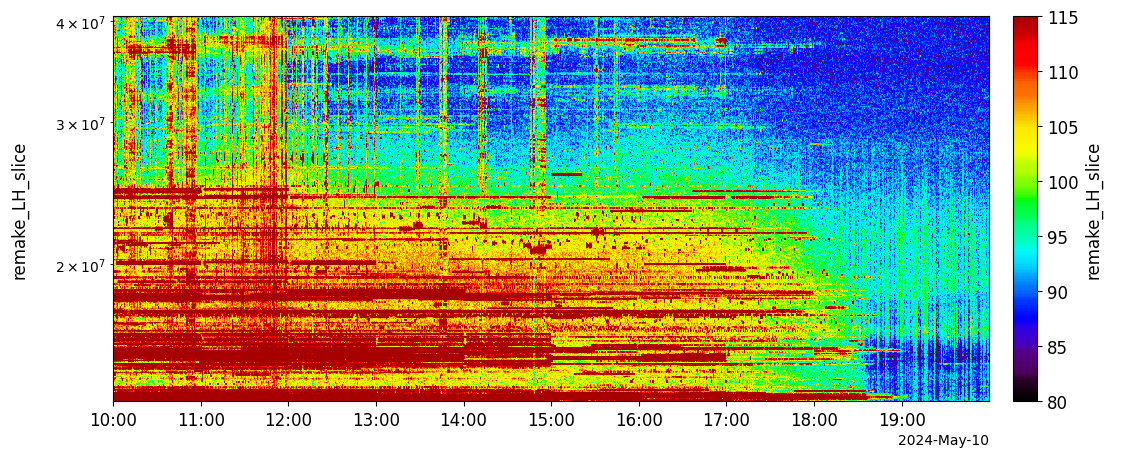

In [3]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[80, 115]}) # z(強度)の分解能は1
pytplot.xlim("2024-05-10 10:00:00", "2024-05-10 19:59:59")
pytplot.tplot('remake_LH_slice')

In [4]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[80, 115]}) # z(強度)の分解能は1
pytplot.xlim("2024-05-10 00:00:00", "2024-05-10 09:59:59")
pytplot.tplot('remake_LH_slice')

n_min = 500 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(28560000., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.856e+07
    v          float32 4B 2.856e+07 

n_max = 900 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(40530000., dtype=float32)
Coordinates:
    spec_bins  float32 4B 4.053e+07
    v          float32 4B 4.053e+07 
 ---------------------------------- 



: 

In [5]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))#/np.mean(data_quants["LH"])
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[80, 107]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:10:00", "2022-06-13 04:30:00")

pytplot.tplot('remake_LH_slice')

n_min = 200 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(19897460., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.99e+07
    v          float32 4B 1.99e+07 

n_max = 900 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(41229248., dtype=float32)
Coordinates:
    spec_bins  float32 4B 4.123e+07
    v          float32 4B 4.123e+07 
 ---------------------------------- 



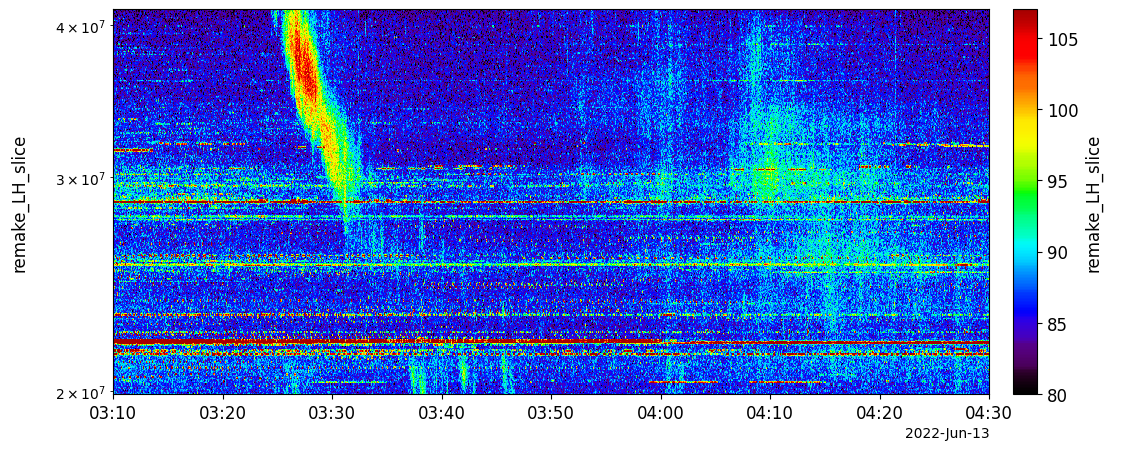

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))#/np.mean(data_quants["LH"])
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[80, 107]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:10:00", "2022-06-13 04:30:00")

pytplot.tplot('remake_LH_slice')

## Harmonic

n_min = 380 = <xarray.DataArray 'spec_bins' ()>
array(25390624., dtype=float32)
Coordinates:
    spec_bins  float32 2.539e+07
    v          float32 2.539e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()>
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 3.818e+07
    v          float32 3.818e+07 
 ---------------------------------- 



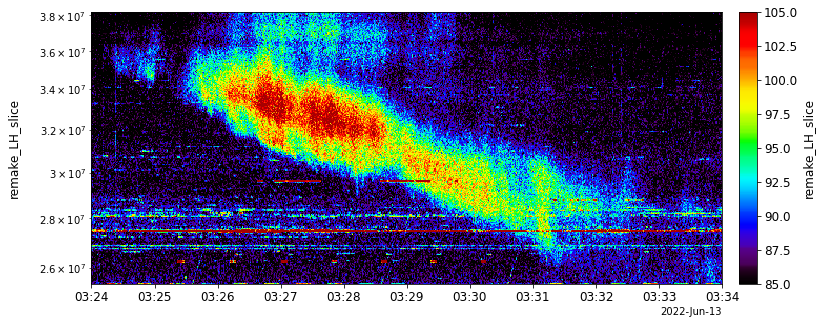

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[85, 105]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:34:00")
pytplot.tplot('remake_LH_slice')

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[85, 105]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:34:00")
pytplot.tplot('remake_LH_slice')

### 1日平均で割る

n_min = 380 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(25390624., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.539e+07
    v          float32 4B 2.539e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



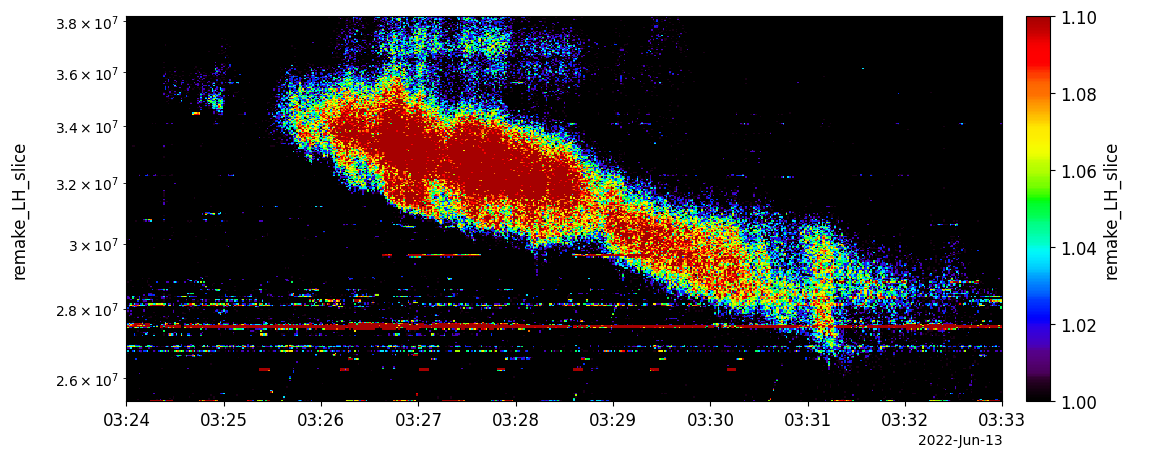

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.0, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')

n_min = 520 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(29663086., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.966e+07
    v          float32 4B 2.966e+07 

n_max = 750 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(36651612., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.665e+07
    v          float32 4B 3.665e+07 
 ---------------------------------- 



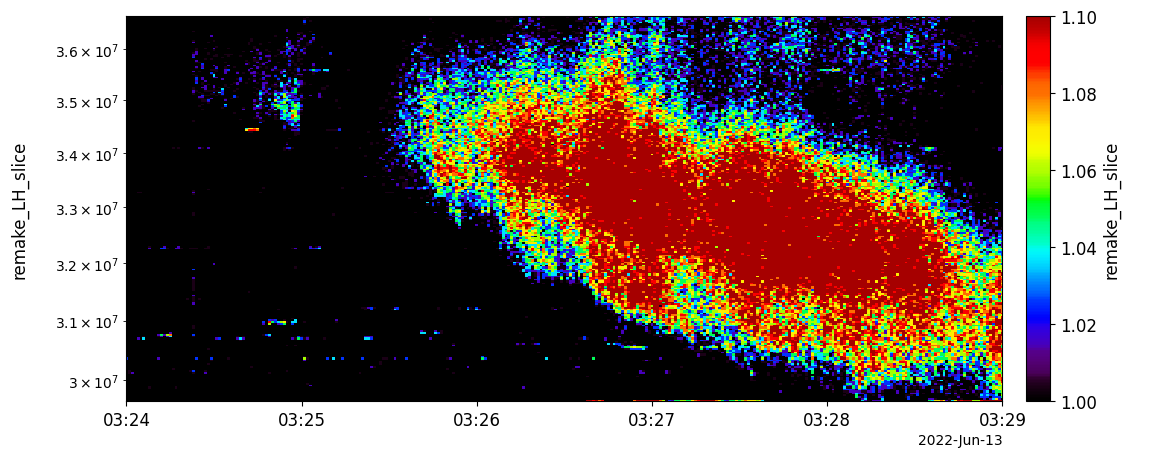

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.0, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:29:00")

pytplot.tplot('remake_LH_slice')


n_min = 600 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(32104492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.21e+07
    v          float32 4B 3.21e+07 

n_max = 700 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(35125732., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.513e+07
    v          float32 4B 3.513e+07 
 ---------------------------------- 



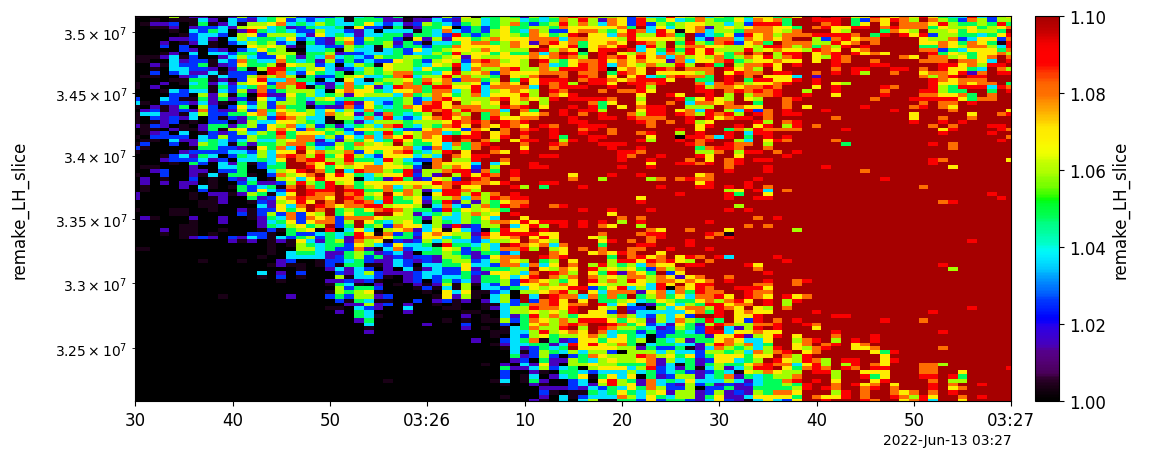

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.0, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:28:30", "2022-06-13 03:29:30")

pytplot.tplot('remake_LH_slice')


## Fundamental

n_min = 0 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(13793945., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.379e+07
    v          float32 4B 1.379e+07 

n_max = 140 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(18035888., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.804e+07
    v          float32 4B 1.804e+07 
 ---------------------------------- 



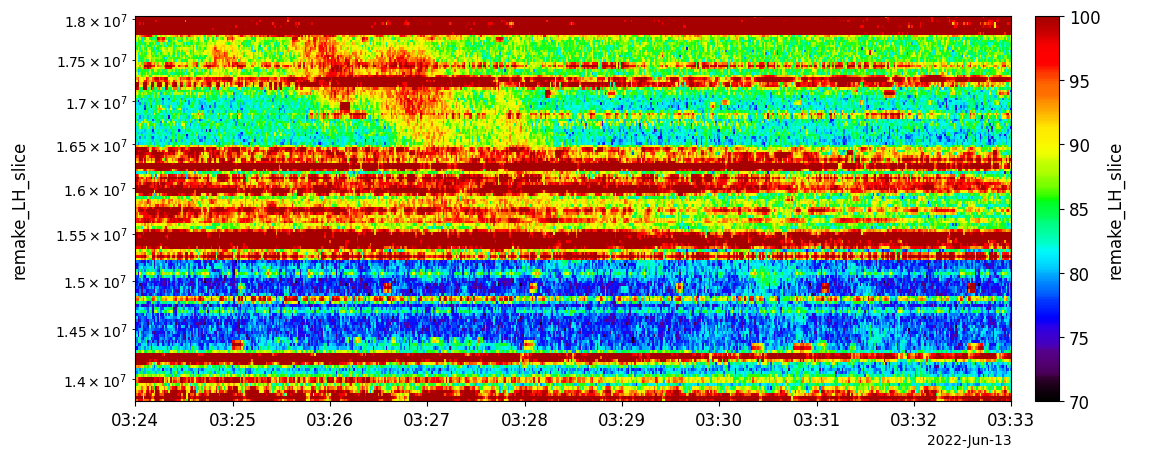

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1, 'zrange':[70, 100]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:33:00")
pytplot.tplot('remake_LH_slice')

n_min = 0 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(13793945., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.379e+07
    v          float32 4B 1.379e+07 

n_max = 140 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(18035888., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.804e+07
    v          float32 4B 1.804e+07 
 ---------------------------------- 



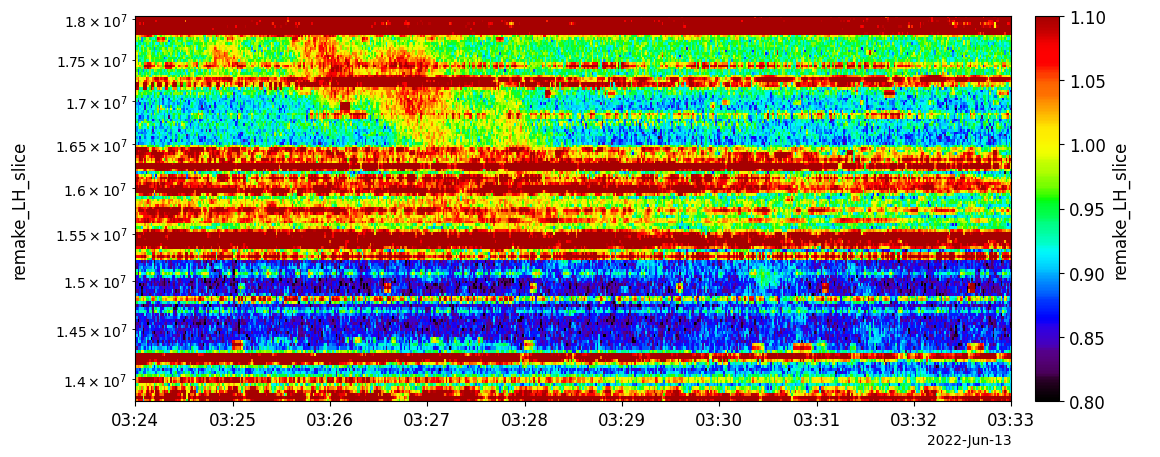

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.8, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')

### 前半

n_min = 85 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(16387939., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.639e+07
    v          float32 4B 1.639e+07 

n_max = 135 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(17883300., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.788e+07
    v          float32 4B 1.788e+07 
 ---------------------------------- 



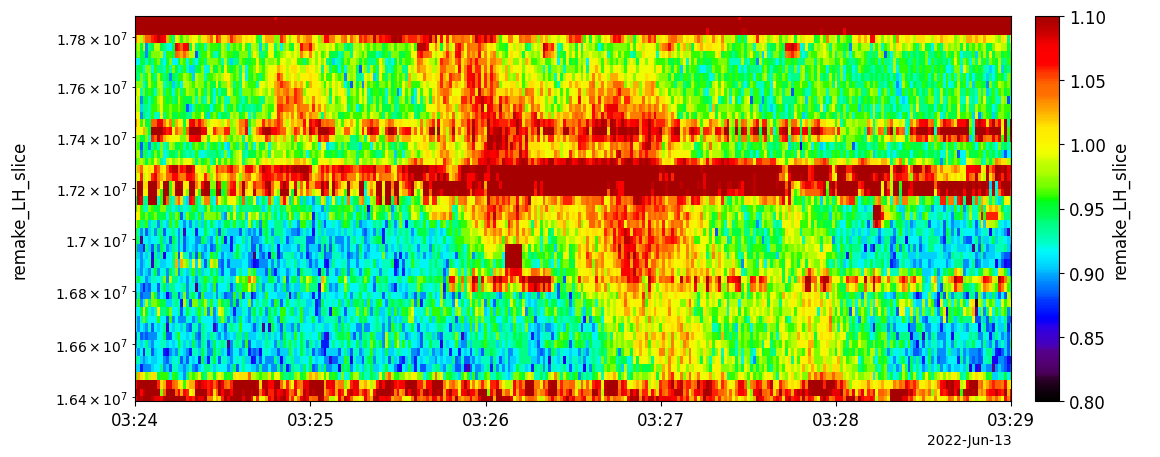

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.8, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:29:00")

pytplot.tplot('remake_LH_slice')

n_min = 85 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(16387939., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.639e+07
    v          float32 4B 1.639e+07 

n_max = 135 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(17883300., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.788e+07
    v          float32 4B 1.788e+07 
 ---------------------------------- 



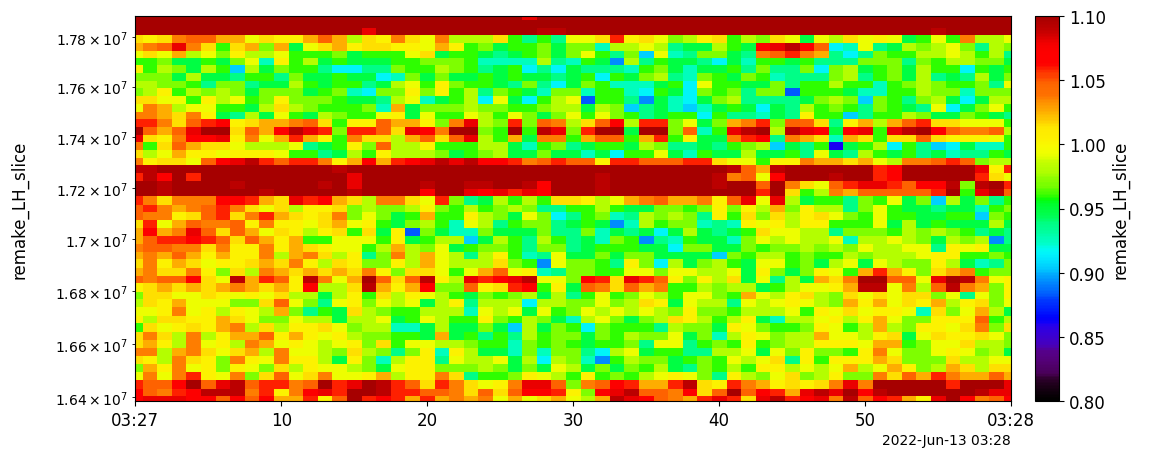

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.8, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:27:00", "2022-06-13 03:28:00")

pytplot.tplot('remake_LH_slice')

### 後半

n_min = 10 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(14099121., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.41e+07
    v          float32 4B 1.41e+07 

n_max = 50 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(15289307., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.529e+07
    v          float32 4B 1.529e+07 
 ---------------------------------- 



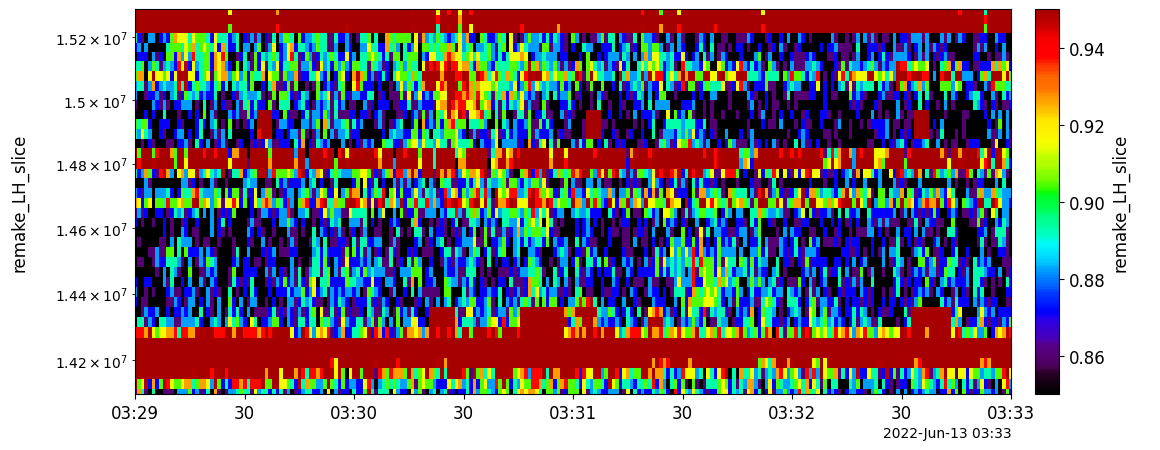

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.85, 0.95]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:29:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.85, 0.95]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:29:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')